In [2]:
# imports 
import math
import numpy as np 
import h5py
import matplotlib.pyplot as plt 
import tensorflow as tf 

%matplotlib inline 

## Data loading and preparation

- Load the data 
- Normalize the image vector

In [3]:
# load the data from compressed file 
train_dataset = h5py.File('datasets/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

print( "train set X origin shape", train_set_x_orig.shape)
print( "train set Y origin shape", train_set_y_orig.shape)
print( "test set X origin shape", test_set_x_orig.shape)
print( "test set Y origin shape", test_set_y_orig.shape)


classes = np.array(test_dataset["list_classes"][:]) # the list of classes

# Normalize these vectors 
X_train = train_set_x_orig/255
X_test = test_set_x_orig/255

Y_train = train_set_y_orig
Y_test = test_set_y_orig


train set X origin shape (1080, 64, 64, 3)
train set Y origin shape (1080,)
test set X origin shape (120, 64, 64, 3)
test set Y origin shape (120,)


# Neural Network Model 

* Here we only want to see how the neural network model works on sign MNIST dataset. 


In [29]:
# making a sequential model with Tensorflow 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# comile the model 
model.compile(optimizer='adam', 
             loss = "sparse_categorical_crossentropy",
             metrics= ["accuracy"])

# model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               6291968   
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 774       
Total params: 6,456,966
Trainable params: 6,456,966
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit the model 
history = model.fit(X_train, Y_train, epochs = 100, batch_size=32, verbose=2)

# model evaluation
model.evaluate(X_test, Y_test)

Epoch 1/100
34/34 - 1s - loss: 0.4371 - accuracy: 0.8435
Epoch 2/100
34/34 - 1s - loss: 0.2503 - accuracy: 0.9111
Epoch 3/100
34/34 - 1s - loss: 0.2554 - accuracy: 0.9046
Epoch 4/100
34/34 - 1s - loss: 0.2770 - accuracy: 0.9056
Epoch 5/100
34/34 - 1s - loss: 0.2307 - accuracy: 0.9157
Epoch 6/100
34/34 - 1s - loss: 0.1658 - accuracy: 0.9435
Epoch 7/100
34/34 - 1s - loss: 0.1785 - accuracy: 0.9407
Epoch 8/100
34/34 - 1s - loss: 0.3039 - accuracy: 0.8880
Epoch 9/100
34/34 - 1s - loss: 0.2619 - accuracy: 0.8981
Epoch 10/100
34/34 - 1s - loss: 0.1398 - accuracy: 0.9593
Epoch 11/100
34/34 - 1s - loss: 0.1406 - accuracy: 0.9500
Epoch 12/100
34/34 - 1s - loss: 0.2634 - accuracy: 0.9000
Epoch 13/100
34/34 - 1s - loss: 0.3410 - accuracy: 0.8741
Epoch 14/100
34/34 - 1s - loss: 0.1847 - accuracy: 0.9333
Epoch 15/100
34/34 - 1s - loss: 0.1098 - accuracy: 0.9704
Epoch 16/100
34/34 - 1s - loss: 0.0898 - accuracy: 0.9722
Epoch 17/100
34/34 - 1s - loss: 0.1414 - accuracy: 0.9454
Epoch 18/100
34/34 - 1s

[0.5202463865280151, 0.8500000238418579]

<Figure size 432x288 with 0 Axes>

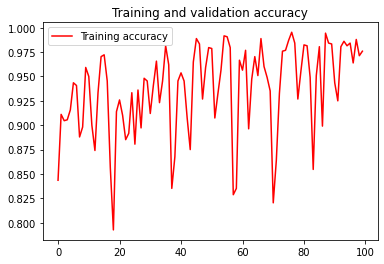

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()